[Download Dataset](https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrency-historical-prices-coingecko?resource=download&select=crypto-com-chain.csv)

Thông tin về dữ liệu: Lịch sử giá có sẵn hàng ngày từ ngày 1 tháng 1 năm 2015.
* date : Ngày quan sát - Giá được thực hiện lúc 00:00:00 giờ
* price: Giá tại ngày và giờ nhất định
* total_volume : khối lượng giao dịch vào ngày nhất định
* market_cap : Vốn hóa thị trường bằng USD

In [4]:
# Nhập Thư viện
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold, GridSearchCV, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso , Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Khám phá dữ liệu (EDA)

In [5]:
# Load dữ liệu
file_path = '../Data/crypto-com-chain.csv'
crypto_data = pd.read_csv(file_path)

In [6]:
# Hiển thị 5 dòng dữ liệu đầu tiên
crypto_data.head()

,date,price,total_volume,market_cap,coin_name
0,2019-01-02,0.021332,1.990475e+06,0.0,crypto-com-chain
1,2019-01-03,0.021255,1.968805e+06,0.0,crypto-com-chain
2,2019-01-04,0.021299,2.399313e+06,0.0,crypto-com-chain
3,2019-01-05,0.021462,2.393238e+06,0.0,crypto-com-chain
4,2019-01-06,0.018654,1.833583e+06,0.0,crypto-com-chain


In [7]:
# Xem chi tiết các thông tin về dữ liệu
crypto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1912 entries, 0 to 1911
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1912 non-null   object 
 1   price         1912 non-null   float64
 2   total_volume  1912 non-null   float64
 3   market_cap    1912 non-null   float64
 4   coin_name     1912 non-null   object 
dtypes: float64(3), object(2)
memory usage: 74.8+ KB


In [8]:
# Mô tả thống kê cơ bản
crypto_data.describe()

,price,total_volume,market_cap
count,1912.000000,1.912000e+03,1.912000e+03
mean,0.127995,6.490371e+07,2.965183e+09
std,0.126278,1.605051e+08,3.321920e+09
min,0.012120,4.175432e+04,0.000000e+00
25%,0.057874,8.432867e+06,8.522707e+08
50%,0.081386,2.146744e+07,1.954070e+09
75%,0.147649,6.163661e+07,3.260968e+09
max,0.891544,2.180022e+09,2.276607e+10


In [9]:
# Kiểm tra giá trị null
crypto_data.isnull().sum()

date            0
price           0
total_volume    0
market_cap      0
coin_name       0
dtype: int64

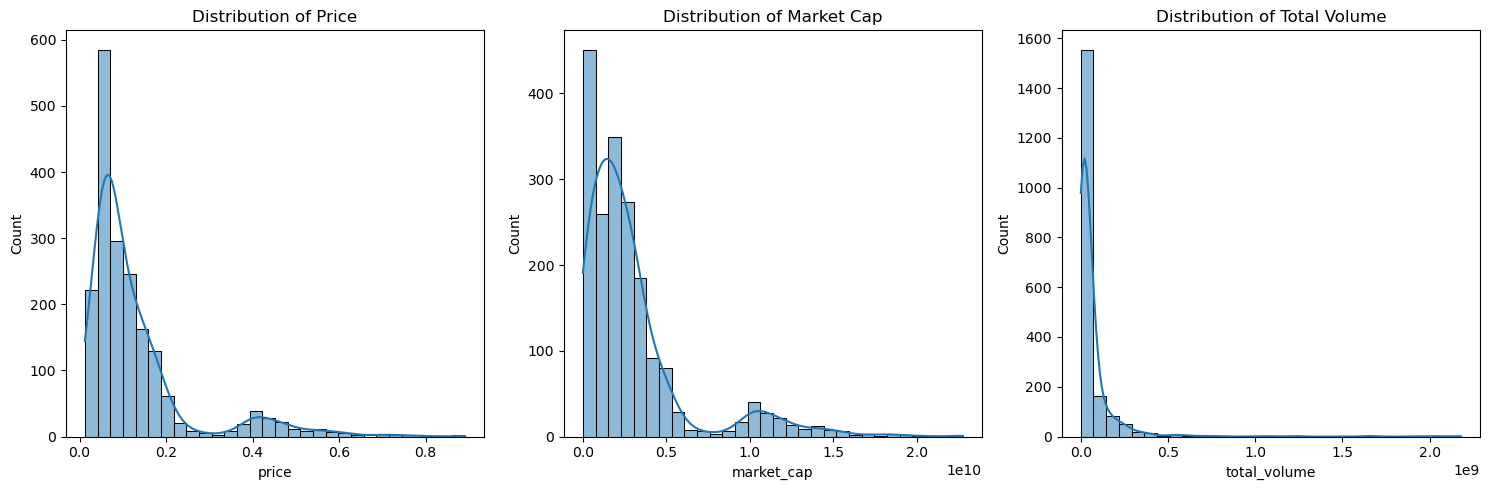

In [10]:
# Phân tích phân bổ dữ liệu
plt.figure(figsize=(15, 5))

# Histogram cho price
plt.subplot(1, 3, 1)
sns.histplot(crypto_data['price'], bins=30, kde=True)
plt.title('Distribution of Price')

# Histogram cho market_cap
plt.subplot(1, 3, 2)
sns.histplot(crypto_data['market_cap'], bins=30, kde=True)
plt.title('Distribution of Market Cap')

# Histogram cho total_volume
plt.subplot(1, 3, 3)
sns.histplot(crypto_data['total_volume'], bins=30, kde=True)
plt.title('Distribution of Total Volume')

plt.tight_layout()
plt.show()

Cả 3 cột price, market_cap, total_volume đều có phân phối lệch trái tức phần lớn các giá trị đều rất nhỏ

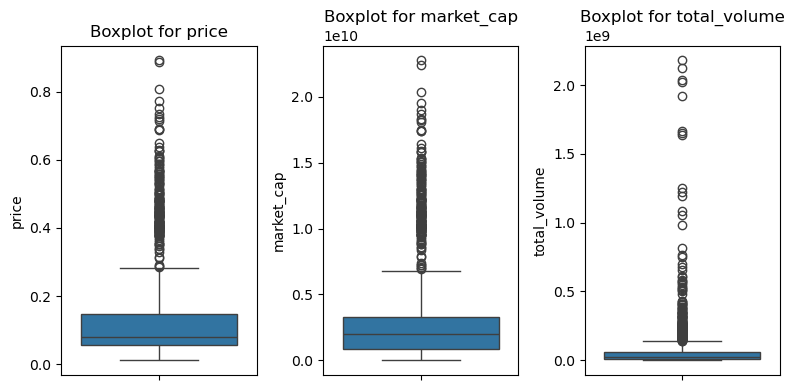

In [11]:
# Phân tích các giá trị ngoại lệ 
# Hàm vẽ boxplot cho từng cột
def plot_boxplot(df, columns):
    plt.figure(figsize=(8, 4))
    for i, column in enumerate(columns, 1):
        plt.subplot(1, len(columns), i)  # Tạo các subplots
        sns.boxplot(y=df[column])
        plt.title(f'Boxplot for {column}')
    plt.tight_layout()
    plt.show()

# Gọi hàm plot_boxplot với các cột cần thiết
columns_to_check = ['price', 'market_cap', 'total_volume']
plot_boxplot(crypto_data, columns_to_check)

Cả 3 biểu đồ đều có 1 số lượng lớn các giá trị ngoại lai 

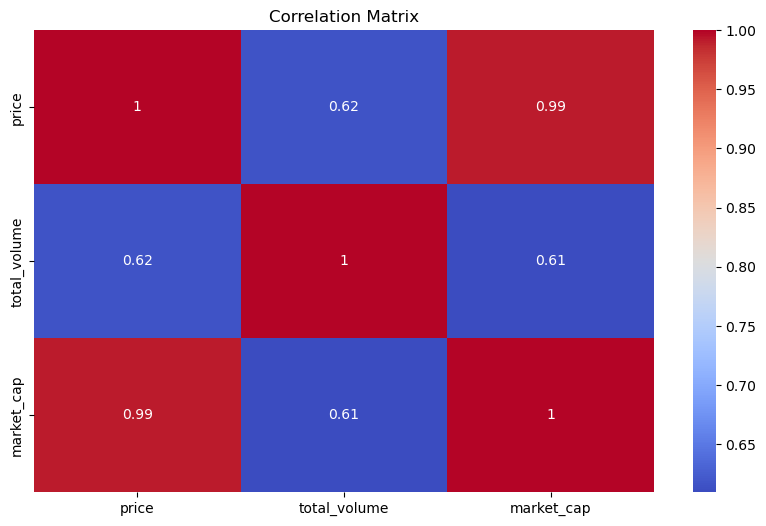

In [12]:
# Loại bỏ cột không phải số (giả sử 'date' là cột không cần thiết)
crypto_data_numeric = crypto_data.select_dtypes(include=['float64', 'int64'])

# Vẽ biểu đồ tương quan giữa các biến
plt.figure(figsize=(10, 6))
sns.heatmap(crypto_data_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()